# Salary American People - Lista 6

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

# Algorithms
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Plot
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

## ---------------------------------------------------------------------------------------------------------------------------------

## Setting columns of dataframe

In [2]:
cols = ['AGE','WORKCLASS','FNLWGT','EDUCATION','EDUCATION_NUM','MERITAL_STATUS','OCCUPATION','RELATIONSHIP',
        'RACE','SEX','CAP_GAIN','CAP_LOST','HOURS_PER_WEEK','NATIVE_COUNTRY','LABEL']
df = pd.read_csv('adult.data', names=cols, na_values='?', sep=',\s+', engine='python')

In [3]:
# Apagando a coluna EDUCATION pois já existe uma outra coluna para EDUCATION
df = df.drop(['EDUCATION'], axis=1)

In [4]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION_NUM,MERITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,NATIVE_COUNTRY,LABEL
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
AGE               32561 non-null int64
WORKCLASS         30725 non-null object
FNLWGT            32561 non-null int64
EDUCATION_NUM     32561 non-null int64
MERITAL_STATUS    32561 non-null object
OCCUPATION        30718 non-null object
RELATIONSHIP      32561 non-null object
RACE              32561 non-null object
SEX               32561 non-null object
CAP_GAIN          32561 non-null int64
CAP_LOST          32561 non-null int64
HOURS_PER_WEEK    32561 non-null int64
NATIVE_COUNTRY    31978 non-null object
LABEL             32561 non-null object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
# Setting precision for 4 decimal places
pd.set_option('precision',4)
df.describe()

,AGE,FNLWGT,EDUCATION_NUM,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK
count,32561.0000,3.2561e+04,32561.0000,32561.0000,32561.0000,32561.0000
mean,38.5816,1.8978e+05,10.0807,1077.6488,87.3038,40.4375
std,13.6404,1.0555e+05,2.5727,7385.2921,402.9602,12.3474
min,17.0000,1.2285e+04,1.0000,0.0000,0.0000,1.0000
25%,28.0000,1.1783e+05,9.0000,0.0000,0.0000,40.0000
50%,37.0000,1.7836e+05,10.0000,0.0000,0.0000,40.0000
75%,48.0000,2.3705e+05,12.0000,0.0000,0.0000,45.0000
max,90.0000,1.4847e+06,16.0000,99999.0000,4356.0000,99.0000


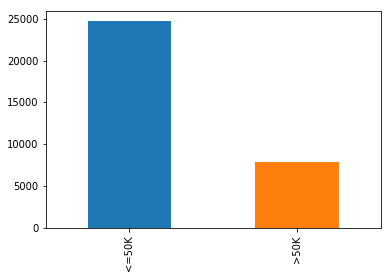

In [8]:
# Showing the difference and why this need be stratified
df['LABEL'].value_counts().plot(kind='bar')

In [9]:
df['LABEL'].value_counts()

<=50K    24720
>50K      7841
Name: LABEL, dtype: int64

## ---------------------------------------------------------------------------------------------------------------------------------

## Preprocessing of data

### Transforming labels to numeric values

In [10]:
# pega a quantidade de valores nulos para cada coluna
df.isna().sum()

AGE                  0
WORKCLASS         1836
FNLWGT               0
EDUCATION_NUM        0
MERITAL_STATUS       0
OCCUPATION        1843
RELATIONSHIP         0
RACE                 0
SEX                  0
CAP_GAIN             0
CAP_LOST             0
HOURS_PER_WEEK       0
NATIVE_COUNTRY     583
LABEL                0
dtype: int64

In [11]:
df[:30]

,AGE,WORKCLASS,FNLWGT,EDUCATION_NUM,MERITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,NATIVE_COUNTRY,LABEL
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(strategy='most_frequent')

In [14]:
data = imputer.fit_transform(df)

In [15]:
cols = ['AGE','WORKCLASS','FNLWGT','EDUCATION_NUM','MERITAL_STATUS','OCCUPATION','RELATIONSHIP',
        'RACE','SEX','CAP_GAIN','CAP_LOST','HOURS_PER_WEEK','NATIVE_COUNTRY','LABEL']

In [16]:
data = pd.DataFrame(data, columns=cols)
data

,AGE,WORKCLASS,FNLWGT,EDUCATION_NUM,MERITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,NATIVE_COUNTRY,LABEL
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [17]:
data.isna().sum()

AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION_NUM     0
MERITAL_STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAP_GAIN          0
CAP_LOST          0
HOURS_PER_WEEK    0
NATIVE_COUNTRY    0
LABEL             0
dtype: int64

In [18]:
# setting mode value for missing values
for column in ['WORKCLASS', 'OCCUPATION', 'NATIVE_COUNTRY']:
    df[column] = df[column].replace(np.nan, df[column].mode()[0])
    
# df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
AGE               32561 non-null int64
WORKCLASS         32561 non-null object
FNLWGT            32561 non-null int64
EDUCATION_NUM     32561 non-null int64
MERITAL_STATUS    32561 non-null object
OCCUPATION        32561 non-null object
RELATIONSHIP      32561 non-null object
RACE              32561 non-null object
SEX               32561 non-null object
CAP_GAIN          32561 non-null int64
CAP_LOST          32561 non-null int64
HOURS_PER_WEEK    32561 non-null int64
NATIVE_COUNTRY    32561 non-null object
LABEL             32561 non-null object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [20]:
df.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION_NUM', 'MERITAL_STATUS',
       'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX', 'CAP_GAIN', 'CAP_LOST',
       'HOURS_PER_WEEK', 'NATIVE_COUNTRY', 'LABEL'],
      dtype='object')

In [21]:
df

,AGE,WORKCLASS,FNLWGT,EDUCATION_NUM,MERITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,NATIVE_COUNTRY,LABEL
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [22]:
# Indentificação das colunas com dados categóricos
cat_columns = df.select_dtypes(['object']).columns
#'Object' é sobre as colunas categóricas)

In [23]:
cat_columns

Index(['WORKCLASS', 'MERITAL_STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE',
       'SEX', 'NATIVE_COUNTRY', 'LABEL'],
      dtype='object')

In [24]:
# Transforming categorics in one-hot encoding
df = pd.get_dummies(df, columns=cat_columns, prefix=cat_columns, drop_first=True)

In [25]:
df.head()

,AGE,FNLWGT,EDUCATION_NUM,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,...,NATIVE_COUNTRY_Puerto-Rico,NATIVE_COUNTRY_Scotland,NATIVE_COUNTRY_South,NATIVE_COUNTRY_Taiwan,NATIVE_COUNTRY_Thailand,NATIVE_COUNTRY_Trinadad&Tobago,NATIVE_COUNTRY_United-States,NATIVE_COUNTRY_Vietnam,NATIVE_COUNTRY_Yugoslavia,LABEL_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df = df.rename(columns={'LABEL_>50K':'LABEL'})

In [27]:
df.columns

Index(['AGE', 'FNLWGT', 'EDUCATION_NUM', 'CAP_GAIN', 'CAP_LOST',
       'HOURS_PER_WEEK', 'WORKCLASS_Local-gov', 'WORKCLASS_Never-worked',
       'WORKCLASS_Private', 'WORKCLASS_Self-emp-inc',
       'WORKCLASS_Self-emp-not-inc', 'WORKCLASS_State-gov',
       'WORKCLASS_Without-pay', 'MERITAL_STATUS_Married-AF-spouse',
       'MERITAL_STATUS_Married-civ-spouse',
       'MERITAL_STATUS_Married-spouse-absent', 'MERITAL_STATUS_Never-married',
       'MERITAL_STATUS_Separated', 'MERITAL_STATUS_Widowed',
       'OCCUPATION_Armed-Forces', 'OCCUPATION_Craft-repair',
       'OCCUPATION_Exec-managerial', 'OCCUPATION_Farming-fishing',
       'OCCUPATION_Handlers-cleaners', 'OCCUPATION_Machine-op-inspct',
       'OCCUPATION_Other-service', 'OCCUPATION_Priv-house-serv',
       'OCCUPATION_Prof-specialty', 'OCCUPATION_Protective-serv',
       'OCCUPATION_Sales', 'OCCUPATION_Tech-support',
       'OCCUPATION_Transport-moving', 'RELATIONSHIP_Not-in-family',
       'RELATIONSHIP_Other-relative', 'RELA

In [28]:
df[7831:7851]

,AGE,FNLWGT,EDUCATION_NUM,CAP_GAIN,CAP_LOST,HOURS_PER_WEEK,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,...,NATIVE_COUNTRY_Puerto-Rico,NATIVE_COUNTRY_Scotland,NATIVE_COUNTRY_South,NATIVE_COUNTRY_Taiwan,NATIVE_COUNTRY_Thailand,NATIVE_COUNTRY_Trinadad&Tobago,NATIVE_COUNTRY_United-States,NATIVE_COUNTRY_Vietnam,NATIVE_COUNTRY_Yugoslavia,LABEL
7831,37,105044,10,0,0,42,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
7832,43,35910,10,0,0,43,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
7833,23,189203,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7834,41,116493,9,13550,0,44,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
7835,42,19700,13,0,0,50,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7836,26,48718,6,2907,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7837,45,106113,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
7838,25,256263,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7839,33,202498,4,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7840,38,120074,13,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
df['LABEL'].unique()

array([0, 1], dtype=uint64)

## ---------------------------------------------------------------------------------------------------------------------------------

## Correlation analisis

In [30]:
## Show correlation
df.corr().style.background_gradient(cmap='RdYlGn').set_precision(4)

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

## Setting dataset for trainning and test

In [31]:
X = df.values[:, :-1]
y = df.values[:, -1]

In [32]:
X = X.astype('float64')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((22792, 82), (22792,), (9769, 82), (9769,))

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

## Standardization of data

In [35]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

### Calculating average for testing

In [36]:
np.average(X_train), np.average(y_train)

(2334.383142031008, 0.24083011583011582)

In [37]:
np.average(X_test), np.average(y_test)

(2318.8953696236727, 0.24076159279353054)

## Using GridSearchCV to test various hiperparameters for various algorithms

### Used classifiers:

- Adaline - Implementation Regis
- Perceptron
- SGDClassifier
- LogisticRegression
- KNeighborsClassifier
- GaussianNB
- SVC
- DecisionTreeClassifier

In [38]:
# setting cv to 5 K-fold using Stratified Kfold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Setting pipelines for each algorithm

In [39]:
pipe = {}
pipe['Perceptron'] = {'pipeline': make_pipeline(StandardScaler(), Perceptron(max_iter=1000, tol=1e-3))}
pipe['SGD'] = {'pipeline': make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, eta0=1))}
pipe['Logistic'] = {'pipeline': make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))}
pipe['KNN'] = {'pipeline': make_pipeline(StandardScaler(), KNeighborsClassifier())}
pipe['Naive'] = {'pipeline': make_pipeline(StandardScaler(), GaussianNB())}
pipe['SVC'] = {'pipeline': make_pipeline(StandardScaler(), SVC())}
pipe['Dectree'] = {'pipeline': make_pipeline(StandardScaler(), DecisionTreeClassifier())}

#pipe_perc = make_pipeline(StandardScaler(), Perceptron(max_iter=1000, tol=1e-3))                                                   #these two params are seted for dont have warnings 
#pipe_sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, eta0=1))
#pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear'))
#pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
#pipe_naive = make_pipeline(StandardScaler(), GaussianNB())
#pipe_svc = make_pipeline(StandardScaler(), SVC())
#pipe_dectree = make_pipeline(StandardScaler(), DecisionTreeClassifier())

### Setting param_range

In [40]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0]
leaf_size = [10,20,30,40,50]

## Setting Param Grid for each algorithm

In [41]:
param_grid = {}
param_grid['Perceptron'] = {'param_grid': [{'perceptron__alpha': param_range, 
                                             'perceptron__penalty': ['l1']},
                                            {'perceptron__alpha': param_range, 
                                             'perceptron__penalty': ['l2']},
                                            {'perceptron__alpha': param_range, 
                                             'perceptron__penalty': ['elasticnet']},
                                            {'perceptron__alpha': param_range,
                                             'perceptron__penalty': [None]}]}

#param_grid_perc =  [{'perceptron__alpha': param_range, 
#                     'perceptron__penalty': ['l1']},
#                    {'perceptron__alpha': param_range, 
#                    'perceptron__penalty': ['l2']},
#                    {'perceptron__alpha': param_range, 
#                     'perceptron__penalty': ['elasticnet']},
#                    {'perceptron__alpha': param_range,
#                    'perceptron__penalty': [None]}]

In [42]:
param_grid['SGD'] = {'param_grid':  [{   'sgdclassifier__alpha': param_range,
                                         'sgdclassifier__learning_rate': ['constant'],
                                         'sgdclassifier__penalty': ['l1']},
                                        {'sgdclassifier__alpha': param_range, 
                                         'sgdclassifier__learning_rate': ['optimal'],
                                         'sgdclassifier__penalty': ['l2']},
                                        {'sgdclassifier__alpha': param_range, 
                                         'sgdclassifier__learning_rate': ['invscaling'],
                                         'sgdclassifier__penalty': ['elasticnet']},
                                        {'sgdclassifier__alpha': param_range,
                                         'sgdclassifier__learning_rate': ['adaptive'],
                                         'sgdclassifier__penalty': [None]}]}

#param_grid_sgd =  [{ 'sgdclassifier__alpha': param_range,
#                     'sgdclassifier__learning_rate': ['constant'],
#                     'sgdclassifier__penalty': ['l1']},
#                    {'sgdclassifier__alpha': param_range, 
#                     'sgdclassifier__learning_rate': ['optimal'],
#                     'sgdclassifier__penalty': ['l2']},
#                    {'sgdclassifier__alpha': param_range, 
#                     'sgdclassifier__learning_rate': ['invscaling'],
#                     'sgdclassifier__penalty': ['elasticnet']},
#                    {'sgdclassifier__alpha': param_range,
#                     'sgdclassifier__learning_rate': ['adaptive'],
#                     'sgdclassifier__penalty': [None]}]

In [43]:
param_grid['Logistic'] = {'param_grid':   [{ 'logisticregression__tol': param_range,
                                             'logisticregression__C': param_range,
                                             'logisticregression__penalty': ['l1']},
                                            {'logisticregression__tol': param_range, 
                                             'logisticregression__C': param_range,
                                             'logisticregression__penalty': ['l2']}]}

#param_grid_lr =  [{  'logisticregression__tol': param_range,
#                     'logisticregression__C': param_range,
#                     'logisticregression__penalty': ['l1']},
#                    {'logisticregression__tol': param_range, 
#                     'logisticregression__C': param_range,
#                     'logisticregression__penalty': ['l2']}]

In [44]:
param_grid['KNN'] = {'param_grid':   [{  'kneighborsclassifier__leaf_size': leaf_size,
                                         'kneighborsclassifier__algorithm': ['auto']},
                                        {'kneighborsclassifier__leaf_size': leaf_size,
                                         'kneighborsclassifier__algorithm': ['ball_tree']},
                                        {'kneighborsclassifier__leaf_size': leaf_size,
                                         'kneighborsclassifier__algorithm': ['kd_tree']},
                                        {'kneighborsclassifier__leaf_size': leaf_size,
                                         'kneighborsclassifier__algorithm': ['brute']}]}

#param_grid_knn =  [{ 'kneighborsclassifier__leaf_size': leaf_size,
#                     'kneighborsclassifier__algorithm': ['auto']},
#                    {'kneighborsclassifier__leaf_size': leaf_size,
#                     'kneighborsclassifier__algorithm': ['ball_tree']},
#                    {'kneighborsclassifier__leaf_size': leaf_size,
#                     'kneighborsclassifier__algorithm': ['kd_tree']},
#                    {'kneighborsclassifier__leaf_size': leaf_size,
#                     'kneighborsclassifier__algorithm': ['brute']}]

In [45]:
param_grid['Naive'] = {'param_grid':   [{'gaussiannb__theta_': param_range,
                                       'gaussiannb__sigma_': param_range,
                                       'gaussiannb__epsilon_': param_range}]}

#param_grid_naive =  [{ 'sgdclassifier__theta_': param_range,
#                       'sgdclassifier__sigma_': param_range,
#                       'sgdclassifier__epsilon_': param_range}]

In [46]:
param_grid['SVC'] = {'param_grid':   [{'svc__C': param_range, 
                                       'svc__kernel': ['linear']},
                                      {'svc__C': param_range, 
                                       'svc__gamma': param_range, 
                                       'svc__kernel': ['rbf']}]}

#param_grid_svc = [{'svc__C': param_range, 
#                   'svc__kernel': ['linear']},
#                  {'svc__C': param_range, 
#                   'svc__gamma': param_range, 
#                   'svc__kernel': ['rbf']}]

In [47]:
param_grid['Dectree'] = {'param_grid':   [{ 'decisiontreeclassifier__max_depth': param_range,
                                             'decisiontreeclassifier__criterion': ['gini']},
                                            {'decisiontreeclassifier__max_depth': param_range, 
                                             'decisiontreeclassifier__criterion': ['entropy']}]}

#param_grid_dectree =  [{ 'decisiontreeclassifier__max_depth': param_range,
#                         'decisiontreeclassifier__criterion': ['gini']},
#                        {'decisiontreeclassifier__max_depth': param_range, 
#                         'decisiontreeclassifier__criterion': ['entropy']}]

## Setting GridSearchCV to estimate the best model for each algorithm

In [48]:
modelos = ['Perceptron', 'SGD', 'Logistic', 'KNN', 'Naive', 'SVC', 'Dectree']

In [49]:
gs = {}
for model in modelos:
    gs[model] = {'gridsearch': GridSearchCV(estimator=pipe[model]['pipeline'],
                              param_grid=param_grid[model]['param_grid'],
                              scoring='accuracy',
                              cv=cv,
                              n_jobs=-1,
                              return_train_score=True)}

In [50]:
gs = {}
gs['Perceptron'] = {GridSearchCV( estimator=pipe_perc,
                                    param_grid=param_grid_perc,
                                    scoring='accuracy',
                                    cv=cv,
                                    n_jobs=-1,
                                    return_train_score=True)}
 
#gs_perc = GridSearchCV( estimator=pipe_perc,
#                        param_grid=param_grid_perc,
#                        scoring='accuracy',
#                        cv=cv,
#                        n_jobs=-1,
#                        return_train_score=True)

NameError: name 'pipe_perc' is not defined

In [ ]:
gs['SGD'] = {GridSearchCV(  estimator=pipe_sgd,
                        param_grid=param_grid_sgd,
                        scoring='accuracy',
                        cv=cv,
                        n_jobs=-1,
                        return_train_score=True)}

#gs_sgd = GridSearchCV(  estimator=pipe_sgd,
#                        param_grid=param_grid_sgd,
#                        scoring='accuracy',
#                       cv=cv,
#                        n_jobs=-1,
#                        return_train_score=True)

In [ ]:
gs_lr = GridSearchCV(   estimator=pipe_lr,
                        param_grid=param_grid_lr,
                        scoring='accuracy',
                        cv=cv,
                        n_jobs=-1,
                        return_train_score=True)

In [ ]:
gs_knn = GridSearchCV(  estimator=pipe_knn,
                        param_grid=param_grid_knn,
                        scoring='accuracy',
                        cv=cv,
                        n_jobs=-1,
                        return_train_score=True)

In [ ]:
gs_naive = GridSearchCV(  estimator=pipe_naive,
                        param_grid=param_grid_naive,
                        scoring='accuracy',
                        cv=cv,
                        n_jobs=-1,
                        return_train_score=True)

In [ ]:
gs_svc = GridSearchCV(  estimator=pipe_svc,
                        param_grid=param_grid_svc,
                        scoring='accuracy',
                        cv=cv,
                        n_jobs=-1,
                        return_train_score=True)

In [ ]:
gs_dectree = GridSearchCV(  estimator=pipe_dectree,
                        param_grid=param_grid_dectree,
                        scoring='accuracy',
                        cv=cv,
                        n_jobs=-1,
                        return_train_score=True)

## Finding the best parameters for each algorithm

In [ ]:
for model in modelos:
    gs[model]['gridsearch'].fit(X_train_std, y_train)
    print("Best score " + model + ": "), gs[model]['gridsearch'].best_score_
    print("Best params " + model + ": "), gs[model]['gridsearch'].best_params_

In [ ]:
gs_perc.fit(X_train_std, y_train)
print('Best score PERCEPTRON: ' , gs_perc.best_score_)
print('Best params PERCEPTRON: ', gs_perc.best_params_)

In [ ]:
gs_sgd.fit(X_train_std, y_train)
print('Best score SGD: ' , gs_sgd.best_score_)
print('Best params SGD: ', gs_sgd.best_params_)

In [ ]:
gs_lr.fit(X_train_std, y_train)
print('Best score LOGISTIC REGRESSION: ' , gs_lr.best_score_)
print('Best params LOGISTIC REGRESSION: ', gs_lr.best_params_)

In [ ]:
gs_knn.fit(X_train_std, y_train)
print('Best score KNN: ' , gs_knn.best_score_)
print('Best params KNN: ', gs_knn.best_params_)

In [ ]:
gs_naive.fit(X_train_std, y_train)
print('Best score NAIVE BAYES: ' , gs_naive.best_score_)
print('Best params NAIVE BAYES: ', gs_naive.best_params_)

In [ ]:
gs_svc.fit(X_train_std, y_train)
print('Best score SVC: ' , gs_svc.best_score_)
print('Best params SVC: ', gs_svc.best_params_)

In [ ]:
gs_dectree.fit(X_train_std, y_train)
print('Best score DECISION TREE: ' , gs_dectree.best_score_)
print('Best params DECISION TREE: ', gs_dectree.best_params_)

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Trainings and predicting with the best models finded

In [ ]:
# Adaline algorithm
best_adaline = AdalineGD(eta=0.01, n_iter=50)
best_adaline.fit(X_train_std, y_train)
y_pred = best_adaline.predict(X_test_std)
print('Test accuracy =: %.3f' % accuracy_score(y_test, y_pred))

In [ ]:
# Perceptron algorithm
best_perceptron = gs_perc.best_estimator_
best_perceptron.fit(X_train_std, y_train)
y_pred = best_perceptron.predict(X_test_std)
print('Test accuracy =: %.3f' % best_perceptron.score(X_test_std, y_test))

In [ ]:
# SGD Classifier algorithm
best_sgd = gs_sgd.best_estimator_
best_sgd.fit(X_train_std, y_train)
y_pred = best_sgd.predict(X_test_std)
print('Test accuracy =: %.3f' % best_sgd.score(X_test_std, y_test))

In [ ]:
# Logistic Regression algorithm
best_lr = gs_lr.best_estimator_
best_lr.fit(X_train_std, y_train)
y_pred = best_lr.predict(X_test_std)
print('Test accuracy =: %.3f' % best_lr.score(X_test_std, y_test))

In [ ]:
# KNN  algorithm
best_knn = gs_knn.best_estimator_
best_knn.fit(X_train_std, y_train)
y_pred = best_knn.predict(X_test_std)
print('Test accuracy =: %.3f' % best_knn.score(X_test_std, y_test))

In [ ]:
# Naive Bayes algorithm
best_naive = gs_naive.best_estimator_
best_naive.fit(X_train_std, y_train)
y_pred = best_naive.predict(X_test_std)
print('Test accuracy =: %.3f' % best_naive.score(X_test_std, y_test))

In [ ]:
# SVC algorithm
best_svc = gs_svc.best_estimator_
best_svc.fit(X_train_std, y_train)
y_pred = best_svc.predict(X_test_std)
print('Test accuracy =: %.3f' % best_svc.score(X_test_std, y_test))

In [ ]:
# Decision Tree Classifier algorithm
best_dectree = gs_dectree.best_estimator_
best_dectree.fit(X_train_std, y_train)
y_pred = best_dectree.predict(X_test_std)
print('Test accuracy =: %.3f' % best_dectree.score(X_test_std, y_test))

# AdalineGD Algorithm

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)